In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import joblib

df=pd.read_csv('MRec.csv')
data=pd.read_csv('MRec2.csv')
df.head()

,Age,Gender,Mood,Genre
0,55,F,Happy,Rock
1,55,F,Gloomy,Blues
2,55,F,Stressed,Rock
3,55,F,Relaxing,Instrumental
4,55,F,Energetic,Hiphop


In [15]:
df.tail()

,Age,Gender,Mood,Genre
785,28,F,Happy,Pop
786,28,F,Gloomy,Indie/Acoustic
787,28,F,Stressed,Rock
788,28,F,Relaxing,Indie/Acoustic
789,28,F,Energetic,Rock


In [16]:
#Mean, std, and quartiles of dataset
data.describe()

,State your age
count,161.000000
mean,27.577640
std,8.425883
min,17.000000
25%,21.000000
50%,24.000000
75%,32.000000
max,55.000000


In [4]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
Age       0
Gender    0
Mood      0
Genre     0
dtype: int64


In [17]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Age : [55 49 47 45 43 42 39 37 36 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20
 19 18 17 44 50]
Gender : ['F' 'M']
Mood : ['Happy' 'Gloomy' 'Stressed' 'Relaxing' 'Energetic']
Genre : ['Rock' 'Blues' 'Instrumental' 'Hiphop' 'Pop' 'Indie/Acoustic' 'Country'
 'EDM']


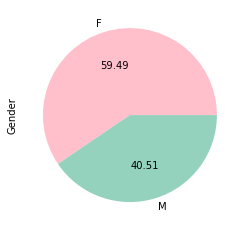

In [18]:
#Distribution of gender by pie-chart
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f", colors = ['pink', '#94d2bd'])
plt.show()

In [19]:
pd.DataFrame(data['Happy'].value_counts()).style.bar(color='thistle')

,Happy
Pop,76
Rock,27
Hiphop,15
Indie/Acoustic,12
Country,11
Instrumental,8
EDM,7
Blues,5


In [20]:
pd.DataFrame(data['Gloomy'].value_counts()).style.bar(color='thistle')

,Gloomy
Indie/Acoustic,48
Instrumental,28
Rock,26
Country,19
Blues,17
Pop,11
EDM,6
Hiphop,6


In [21]:
pd.DataFrame(df['Genre'].value_counts()).style.bar(color='thistle')

,Genre
Pop,164
Rock,159
Indie/Acoustic,140
Instrumental,117
Hiphop,66
Country,63
Blues,41
EDM,40


In [ ]:
#Distribution of genre by pie-chart
df['Genre'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [22]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(790, 4)


In [23]:
#Replacing categorical data with integer values
df['Gender'].replace(['M','F'],[0,1], inplace=True)

#Replace null values with NaN
df['Age'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Age'])
df['Gender'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Gender'])
df['Mood'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Mood'])

df.head(7)


,Age,Gender,Mood,Genre
0,55,1,Happy,Rock
1,55,1,Gloomy,Blues
2,55,1,Stressed,Rock
3,55,1,Relaxing,Instrumental
4,55,1,Energetic,Hiphop
5,49,0,Happy,Rock
6,49,0,Gloomy,Pop


In [24]:
#Ordinal Encoder for mood
from category_encoders import OrdinalEncoder

mapping_1 = {}
for category in sorted(list(df['Mood'].unique())):
    mapping_1[category] = sorted(list(df['Mood'].unique())).index(category)

maplist_1 = [{'col': 'Mood', 
            'mapping': mapping_1}]

Ordinal_Encoder_1 = OrdinalEncoder(mapping=maplist_1)

df = Ordinal_Encoder_1.fit_transform(df)
df.head(10)

,Age,Gender,Mood,Genre
0,55,1,2,Rock
1,55,1,1,Blues
2,55,1,4,Rock
3,55,1,3,Instrumental
4,55,1,0,Hiphop
5,49,0,2,Rock
6,49,0,1,Pop
7,49,0,4,Rock
8,49,0,3,Instrumental
9,49,0,0,Pop


In [ ]:
#Replacing NaN instances with mean values
columns=df[['Age','Gender']]
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
df.head()

In [ ]:
#Checking for null values again
df.isnull().sum()

In [ ]:
#Histogram of age
plt.hist(data['Age'], bins=6, rwidth=0.9, color="#ffb5a7")
plt.xlabel("Age")
plt.ylabel("Count of age demographics in dataset:")

plt.show()

In [ ]:
plt.hist(data['Happy'],color = "#bde0fe", rwidth=0.9)

In [ ]:
plt.hist(data['Gloomy'],color = "#bde0fe", rwidth=0.9)

In [ ]:
plt.hist(data['Stressed'],color = "#bde0fe", rwidth=0.9)

In [ ]:
plt.hist(data['Energetic'],color = "#bde0fe", rwidth=0.9)

In [ ]:
plt.hist(data['Relaxing'],color = "#bde0fe", rwidth=0.9)

In [ ]:
#Boxplot between Age and Genre, coloured by Gender
sns.boxplot(x='Age',y='Genre',hue='Gender',color = '#bbdef9',data=df)

In [ ]:
#Correlation between Mood and Genre
sns.heatmap(pd.crosstab(df['Mood'], df['Genre']))

In [ ]:
#Correlation between which Genre is preferred by age groups when Happy
sns.heatmap(pd.crosstab(data['Age'], data['Happy']))

In [ ]:
#Correlation between which Genre is preferred by age groups when Gloomy
sns.heatmap(pd.crosstab(data['Age'], data['Gloomy']))

In [ ]:
#Correlation between which Genre is preferred by age groups when Stressed
sns.heatmap(pd.crosstab(data['Age'], data['Stressed']))

In [ ]:
#Correlation between which Genre is preferred by age groups when Relaxing
sns.heatmap(pd.crosstab(data['Age'], data['Relaxing']))

In [ ]:
#Correlation between which Genre is preferred by age groups when Energetic
sns.heatmap(pd.crosstab(data['Age'], data['Energetic']))

In [ ]:
#Pairplot between all numerical categories
sns.set_style("whitegrid");
columns = ['Age','Gender','Mood']
sns.pairplot(df[columns], hue="Gender",height = 4 ,kind ='scatter',diag_kind='kde')
plt.show()

In [ ]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [ ]:
#Model testing
#df['Mood'].replace(['Happy','Gloomy','Stressed','Energetic','Relaxing'],[0,1], inplace=True)
X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size = 0.25, random_state = 1000)
model=DecisionTreeClassifier(criterion="entropy")
model=model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
#Classification accuracy can be misleading 
#if you have an unequal number of observations in each class, or if you have more than two classes in your dataset.
print(metrics.classification_report(y_test, model.predict(X_test)))

print(accuracy_score(y_test, model.predict(X_test)))

print(metrics.confusion_matrix(y_test, model.predict(X_test)))

In [ ]:
#data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

#fit scaler on training data
norm = MinMaxScaler().fit(X_train)

#transform training data
X_train_norm = norm.transform(X_train)

#transform testing dataabs
X_test_norm = norm.transform(X_test)

from joblib import dump, load
joblib.dump(model,'C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')

predictions=model.predict(X_test)

In [ ]:
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler
mdl = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
X= pd.read_csv('MRec.csv')
X_test = [[21,1,0],[22,0,3],[29,0,4],[31,0,3],[55,1,3]]
y_pred=mdl.predict(X_test)

val=pd.DataFrame(y_pred, columns=['Genre'])
val

In [ ]:
#Load saved model
lr = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')

X=[[21,1,0],[22,0,3],[29,0,4],[31,0,3],[55,1,3]]
lr.predict(X)

In [ ]:
#Outliers
#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#iqr=q3-q1

#print(   (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))  )